# Face Mask Detector

This code is used to load the data stored and feed them to our Convolutional Neural Network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [3]:
#normalizing the data
data = data/255.0

In [4]:
labels = np.reshape(labels, (labels.shape[0],1))
print(labels.shape)

(8477, 1)


In [5]:
import keras

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu", input_shape = data.shape[1:], padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(1, activation = "sigmoid"))

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 42)

The below code is used to monitor the epochs based on the validation loss and the models with least validation loss are aumatically saved.

In [10]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

In [11]:
history = model.fit(X_train, y_train, callbacks = [checkpoint], validation_data = (X_test, y_test), epochs = 10)

Train on 7629 samples, validate on 848 samples
Epoch 1/10
7629/7629 [==============================] - 162s 21ms/step - loss: 0.1690 - accuracy: 0.9439 - val_loss: 0.1259 - val_accuracy: 0.9575
Epoch 2/10
7629/7629 [==============================] - 165s 22ms/step - loss: 0.0489 - accuracy: 0.9811 - val_loss: 0.0447 - val_accuracy: 0.9835
Epoch 3/10
7629/7629 [==============================] - 166s 22ms/step - loss: 0.0305 - accuracy: 0.9899 - val_loss: 0.1011 - val_accuracy: 0.9575
Epoch 4/10
7629/7629 [==============================] - 168s 22ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 0.9894
Epoch 5/10
7629/7629 [==============================] - 165s 22ms/step - loss: 0.0247 - accuracy: 0.9916 - val_loss: 0.0449 - val_accuracy: 0.9894
Epoch 6/10
7629/7629 [==============================] - 165s 22ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 0.0415 - val_accuracy: 0.9929
Epoch 7/10
7629/7629 [==============================] - 165s 22ms/step 

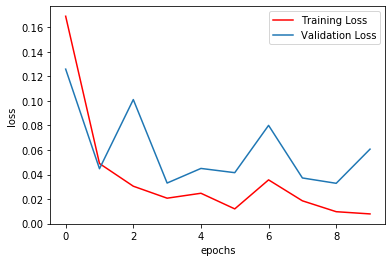

In [12]:
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

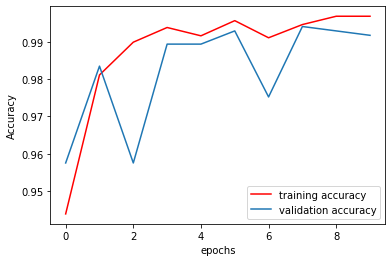

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)

848/848 [==============================] - 6s 7ms/step


In [15]:
print(f"Accuracy = {round(accuracy * 100, 2)} %")

Accuracy = 99.17 %


In [16]:
model.save("Face_Mask_Predictor.h5")